# <b> Import Libraries <b/>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, Image
import os

<b> Creating Functions <b/>
- `remove_logo` : Utilize trained model to detect logo and diplay original image.
- `get_get_coordinates_and_fill` : Extract coordinates of bounded box and fill this bounded box with background color then return image
- `save_image` : This function take the image and output path to save the image without logo (with the same image name)

In [ ]:
def get_coordinates_and_fill(RESULTS , IMAGE):
  # Handling error here so if the model didn't detect the logo
  try:
    x1,y1,x2,y2 = RESULTS[0].boxes.xyxy[0]
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
  except:
    print(f"failed to detect the logo of image {RESULTS[0].path}")

  # Extract logo and show it
  logo = IMAGE[y1:y2,x1:x2]
  image_rgb = cv.cvtColor(logo, cv.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()

  #Get the average color of the background to fill the bounded box with it
  background_color= np.mean(IMAGE[y2:y2+1,x1-1:x2], axis=(0, 1))
  mask = np.full(logo.shape,background_color)
  IMAGE[y1:y2,x1:x2] = mask

  #Display image after remove logo
  image_rgb = cv.cvtColor(IMAGE, cv.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()
  return IMAGE


In [ ]:
def save_image(OUTPUT_PATH,RESULTS , IMAGE):
  #First ensure that the file not exists before then create it
  if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
    print(f"Folder '{OUTPUT_PATH} created successfully.")
  else:
    print(f"Folder '{OUTPUT_PATH}' already exists.")

  #Getting the name of the input image
  image_name = RESULTS[0].path.split('/')[-1].split(".")[0]

  #Save the output image without logo
  cv.imwrite(f'{OUTPUT_PATH}/{image_name}_withoutlogo.jpg' ,IMAGE)

In [ ]:
def remove_logo(INPUT_PATH , OUTPUT_PATH , MODEL_PATH):
  #First display the original image
    img = cv.imread(INPUT_PATH)
    image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Load Model
    model = YOLO(MODEL_PATH)

    # Use the model to detect logo
    results = model(INPUT_PATH)

    # Calling second function to get bounded box in the original image and fill it with background color
    image = get_coordinates_and_fill(results , img)

    # Save the image without logo
    save_image(OUTPUT_PATH,results,image)
    return

In [ ]:
#MODEL_PATH = "ENTER_THE_PATH_OF_THE_PROVIDED_MODEL_[best.pt]"
MODEL_PATH = "/content/Remove_National_Id_Logo/model.pt"

#INPUT_PATH ='ENTER_YOUR_TEST_IMAGE_PATH'
INPUT_PATH = '/content/Remove_National_Id_Logo/input/55.jpg'

#OUT_PAGH = 'ENTER_YOUR_OUTPUT_PATH'
OUTPUT_PATH = '/content/output'

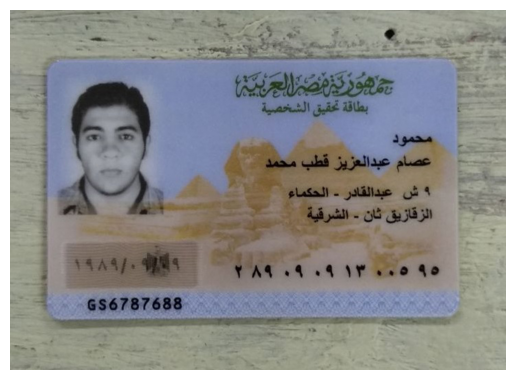


image 1/1 /content/Remove_National_Id_Logo/input/55.jpg: 480x640 1 logo, 292.1ms
Speed: 15.0ms preprocess, 292.1ms inference, 2848.3ms postprocess per image at shape (1, 3, 480, 640)


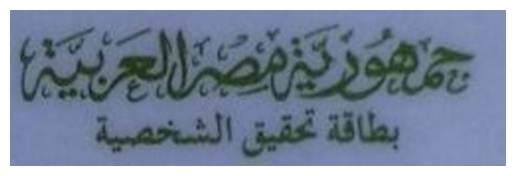

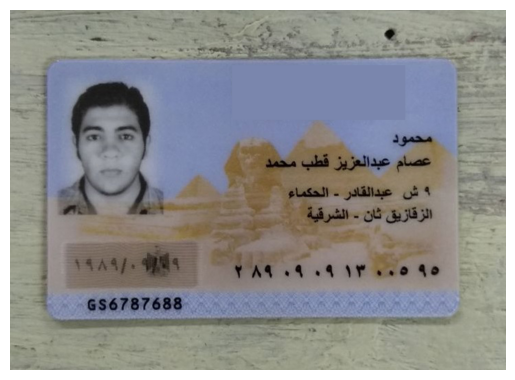

Folder '/content/output created successfully.


In [ ]:
remove_logo(INPUT_PATH,OUTPUT_PATH,MODEL_PATH)

In [ ]:
#MODEL_PATH = "ENTER_THE_PATH_OF_THE_PROVIDED_MODEL_[best.pt]"
MODEL_PATH = "/content/Remove_National_Id_Logo/model.pt"

#INPUT_PATH ='ENTER_YOUR_TEST_IMAGE_PATH'
INPUT_PATH = '/content/Remove_National_Id_Logo/input/48.jpg'

#OUT_PAGH = 'ENTER_YOUR_OUTPUT_PATH'
OUTPUT_PATH = '/content/output'

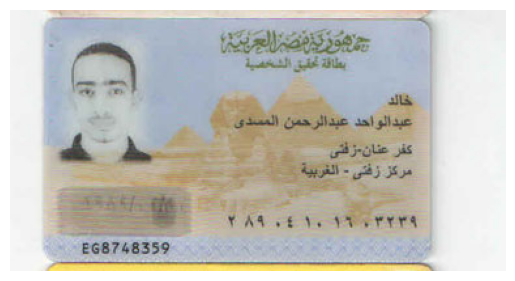


image 1/1 /content/Remove_National_Id_Logo/input/48.jpg: 352x640 1 logo, 200.0ms
Speed: 3.2ms preprocess, 200.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


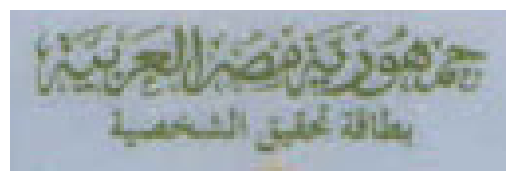

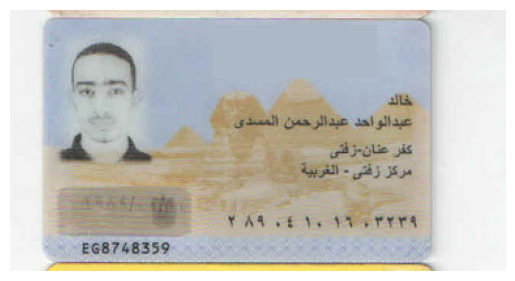

Folder '/content/output' already exists.


In [ ]:
remove_logo(INPUT_PATH,OUTPUT_PATH,MODEL_PATH)